### Below an example of how to retreive the results of a single arxiv query, with the search term "all:electron"

In [1]:
    import urllib, urllib.request
    url = 'http://export.arxiv.org/api/query?search_query=all:electron&start=0&max_results=1'
    data = urllib.request.urlopen(url)
    print(data.read().decode('utf-8'))

<?xml version="1.0" encoding="UTF-8"?>
<feed xmlns="http://www.w3.org/2005/Atom">
  <link href="http://arxiv.org/api/query?search_query%3Dall%3Aelectron%26id_list%3D%26start%3D0%26max_results%3D1" rel="self" type="application/atom+xml"/>
  <title type="html">ArXiv Query: search_query=all:electron&amp;id_list=&amp;start=0&amp;max_results=1</title>
  <id>http://arxiv.org/api/cHxbiOdZaP56ODnBPIenZhzg5f8</id>
  <updated>2022-10-31T00:00:00-04:00</updated>
  <opensearch:totalResults xmlns:opensearch="http://a9.com/-/spec/opensearch/1.1/">189264</opensearch:totalResults>
  <opensearch:startIndex xmlns:opensearch="http://a9.com/-/spec/opensearch/1.1/">0</opensearch:startIndex>
  <opensearch:itemsPerPage xmlns:opensearch="http://a9.com/-/spec/opensearch/1.1/">1</opensearch:itemsPerPage>
  <entry>
    <id>http://arxiv.org/abs/cond-mat/0102536v1</id>
    <updated>2001-02-28T20:12:09Z</updated>
    <published>2001-02-28T20:12:09Z</published>
    <title>Impact of Electron-Electron Cusp on Configur

### For optimal data query bertopic must be better understood

In [4]:
import pandas as pd
import re

#### Below is the example from bertopic website, running it here to get a better understanding of how the date should be formatted

In [5]:
# Prepare data
trump = pd.read_csv('https://drive.google.com/uc?export=download&id=1xRKHaP-QwACMydlDnyFPEaFdtskJuBa6')
trump.text = trump.apply(lambda row: re.sub(r"http\S+", "", row.text).lower(), 1)
trump.text = trump.apply(lambda row: " ".join(filter(lambda x:x[0]!="@", row.text.split())), 1)
trump.text = trump.apply(lambda row: " ".join(re.sub("[^a-zA-Z]+", " ", row.text).split()), 1)
trump = trump.loc[(trump.isRetweet == "f") & (trump.text != ""), :]
timestamps = trump.date.to_list()
tweets = trump.text.to_list()

In [12]:
timestamps[0]

'2011-08-02 18:07:48'

In [13]:
tweets[0]

'republicans and democrats have both created our economic problems'

#### Two lists, each with corresponding date and data

### To Scrape each org of workshops custom code must be written for each, below is AAAI

Scrape this class attribute: et_pb_text_inner
et_pb_text_inner

In [20]:
AAAIUrl = ['https://aaai.org/Conferences/AAAI-18/ws18workshops/#ws01',
           'https://aaai.org/Conferences/AAAI-19/ws19workshops/#ws01',
           'https://aaai.org/Conferences/AAAI-20/ws20workshops/#ws01',
           'https://aaai.org/Conferences/AAAI-21/ws21workshops/#ws01',
           'https://aaai.org/Conferences/AAAI-22/ws22workshops/#ws01',
           'https://aaai.org/Conferences/AAAI-23/ws23workshops/#ws01']

AAAIDiv = 'et_pb_text_inner'


In [38]:
import requests
import csv
from bs4 import BeautifulSoup as bs

In [21]:
for year, url in enumerate(AAAIUrl, start = 2018):
    
    req = requests.get(url)
    soup = bs(req.text, 'html.parser')
      
    abstracts = soup.find_all('div',attrs = {'class',AAAIDiv})
    
    with open('abstracts_AAAI', 'a') as f:
        
        write = csv.writer(f)
        
        for abstractNumber in range(0,len(abstracts)):
            
            write.writerow([abstracts[abstractNumber].text, f'{year}'])

### Importing the data here to test for fuck ups 

In [22]:
data = pd.read_csv(r'abstracts_AAAI')
df = pd.DataFrame(data)
df.columns = ['abstract', 'year']
#df = df.dropna(axis=0)

In [33]:
df

,abstract,year
0,\nImportant Dates for Workshop Organizers\n\n\...,2018
1,\n\nW1: Affective Content Analysis\nW2: AI and...,2018
2,\n\nW01 — Affective Content Analysis\nAffect a...,2018
3,\nThis site is protected by copyright and trad...,2018
4,"AAAI-19 Workshop Program\nJanuary 27-28, 2019\...",2019
5,Important Dates for Workshop Organizers\n\n\nN...,2019
6,\n\nW1: Affective Content Analysis: Modeling ...,2019
7,\nW01 — Affective Content Analysis: Modeling A...,2019
8,This site is protected by copyright and tradem...,2019
9,"AAAI-20 Workshop Program\nFebruary 7-8, 2020Ne...",2020


## ICLR

Luckily uses the same layout as ICLM, so not much custom code has to be written.

In [35]:
array18 = [[2018],[*range(402,583)]]
array19 = [[2019],[*range(629,637),1207]]
array20 = [[2020],[*range(1295,1309)]]
array21 = [[2021],[*range(2121, 2148)]]
array22 = [[2022],[*range(4547,4565),9069]]

allArrays = [array18, array19, array20, array21, array22]

In [36]:
for array in allArrays:
    
    for eventID in array[1]:
    
        #Change below later so can iterate through all arrays from 17-22
        year = array[0][0]
    
        URL = f'https://iclr.cc/Conferences/{year}/Schedule?showEvent={eventID}'

        #print(URL, year)
    
        req = requests.get(URL)
        soup = bs(req.text, 'html.parser')
      
        abstracts = soup.find_all('div',attrs = {'class','abstractContainer'})
        #authors = soup.find_all('div', attrs = {'class', 'maincardfooter'})
    
        with open('abstracts_iclr', 'a') as f:
        
            write = csv.writer(f)
        
            for abstractNumber in range(0,len(abstracts)):
                #print(abstracts[abstractNumber].text)
            
         #       write.writerow([abstracts[abstractNumber].text, f'{authors}', f'{year}'])

In [37]:
data = pd.read_csv(r'abstracts_iclr')
df = pd.DataFrame(data)
df.columns = ['abstract', 'year']
#df = df.dropna(axis=0)
df

,abstract,year
0,Deep reinforcement learning algorithms have re...,2018
1,Tractable approximate Bayesian inference for d...,2018
2,We argue for the benefit of designing deep gen...,2018
3,The field of ML is distinguished both by rapid...,2018
4,GANS are powerful generative models that are a...,2018
...,...,...
244,The constant progress being made in artificial...,2022
245,Emergent Communication (EC) studies learning t...,2022
246,We are at a pivotal moment in healthcare chara...,2022
247,While the study of generalization has played a...,2022


## NeurIPS

#### NeurIPS has an idential layout to ICLM and ICLR, aren't we just lucky.

In [39]:
array18 = [[2018],[*range(10903,10946)]]
array19 = [[2019],[*range(13154,13204),15423]]
array20 = [[2020],[*range(16103,16162),[19593, 19592]]]
array21 = [[2021],[*range(21827,21886)]]
array22 = [[2022],[*range(49957,50019)]]

allArrays = [array18, array19, array20, array21, array22]

In [40]:
for array in allArrays:
    
    for eventID in array[1]:
    
        #Change below later so can iterate through all arrays from 17-22
        year = array[0][0]
    
        URL = f'https://nips.cc/Conferences/{year}/Schedule?showEvent={eventID}'

        #print(URL, year)
    
        req = requests.get(URL)
        soup = bs(req.text, 'html.parser')
      
        abstracts = soup.find_all('div',attrs = {'class','abstractContainer'})
    
        with open('abstracts_neurIps', 'a') as f:
        
            write = csv.writer(f)
        
            for abstractNumber in range(0,len(abstracts)):
                #print(abstracts[abstractNumber].text)
            
                write.writerow([abstracts[abstractNumber].text, f'{year}'])

In [27]:
data = pd.read_csv(r'abstracts_iclr')
dfNeurIps = pd.DataFrame(data)
dfNeurIps.columns = ['abstract', 'year']
#df = df.dropna(axis=0)

In [46]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/datadeliv/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [47]:
from nltk.corpus import stopwords
# Get the list of stopwords
stop_words = set(stopwords.words('english'))

# Remove stopwords from the Text column
dfNeurIps['abstract'] = dfNeurIps['abstract'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))


In [48]:
dfNeurIps['abstract'] = dfNeurIps['abstract'].astype(str)

## IJCAI

In [ ]:
IJCAIUrl [['https://ijcai-22.org/workshop/', 'elementor-widget-container'],
          ['https://ijcai-21.org/workshops/','entry-content clear'],
          ['https://ijcai20.org/workshops/','column-4'],
          ['',''],
          ['',''],
         
         
         ]    
    
    = 'entry-content clear'


In [53]:
NeurIpsList = dfNeurIps.abstract.tolist()

In [50]:
timestamps = dfNeurIps.year.tolist()

### Training happens below this line

In [15]:
#import importlib.abc
#If this godforsaken package complains about torch missing uninstall with pip and reinstall, may be 
#due to conflicts with directory structure around different pyenv, namelig 3.10 and 3.9
from bertopic import BERTopic

/home/datadeliv/.pyenv/versions/3.9.15/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [54]:
topic_model = BERTopic(verbose=True)
topics, probs = topic_model.fit_transform(NeurIpsList)

Batches: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:10<00:00,  1.26s/it]
2022-12-03 18:16:31,216 - BERTopic - Transformed documents to Embeddings
2022-12-03 18:16:33,358 - BERTopic - Reduced dimensionality
2022-12-03 18:16:33,372 - BERTopic - Clustered reduced embeddings


In [55]:
topics_over_time = topic_model.topics_over_time(NeurIpsList, timestamps)

5it [00:00, 35.91it/s]


### Tunning

In [63]:
topics_over_time = topic_model.topics_over_time(NeurIpsList, timestamps, 
                                                global_tuning=True, evolution_tuning=True, nr_bins=20)

5it [00:00, 33.93it/s]


### Visualization

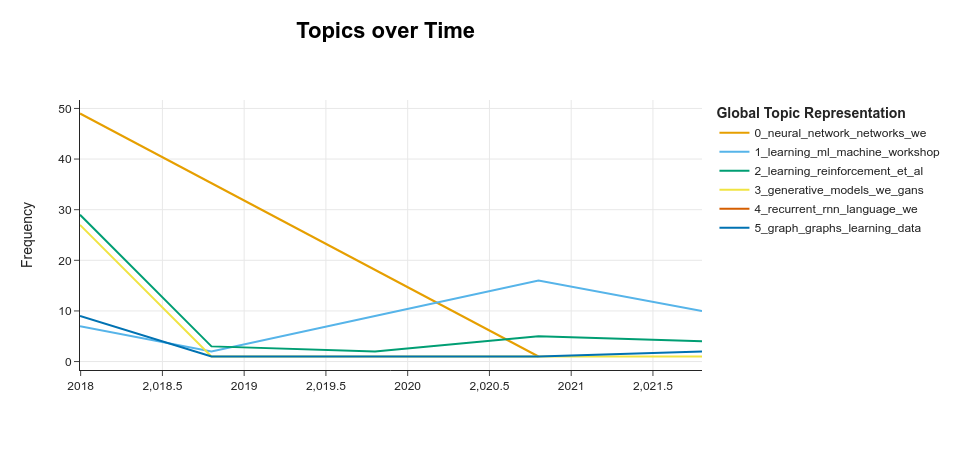

In [64]:
topic_model.visualize_topics_over_time(topics_over_time)

In [3]:
import pandas as pd

In [4]:
# Load the three csv files
df1 = pd.read_csv('abstracts_iclr')
df2 = pd.read_csv('abstracts_neurIps')
df3 = pd.read_csv('abstracts_icml')


In [5]:
df1.columns = ['abstract', 'year']
df2.columns = ['abstract', 'year']
df3.columns = ['abstract', 'year']

In [7]:
all_df = [df1,df2,df3]

In [8]:
merged = pd.concat(all_df)


In [11]:
merged = merged.sort_values('year')

In [12]:
merged['abstract'] = merged['abstract'].astype(str)
merged_abstract = merged.abstract.tolist()
timestamps_merged = merged.year.tolist()

In [16]:
topic_model = BERTopic(verbose=True)
topics, probs = topic_model.fit_transform(merged_abstract)


Batches: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 21/21 [00:35<00:00,  1.69s/it]
2022-12-03 19:28:47,170 - BERTopic - Transformed documents to Embeddings
2022-12-03 19:28:55,412 - BERTopic - Reduced dimensionality
2022-12-03 19:28:55,438 - BERTopic - Clustered reduced embeddings


In [17]:
topics_over_time = topic_model.topics_over_time(merged_abstract, timestamps_merged)

6it [00:00, 21.37it/s]


In [18]:
topic_model.get_topic_info()

,Topic,Count,Name
0,0,657,0_the_and_of_to
1,1,12,1_nan_shakedrop_regularization_resnext


In [19]:
topic_model.visualize_topics()

ValueError: zero-size array to reduction operation maximum which has no identity